In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import time

import os
import sys

module_path = os.path.abspath('../') # root directory
if module_path not in sys.path:
    sys.path.append(module_path)

from consensus.protocols import slush

# import warnings
# warnings.filterwarnings("ignore")

# Slush algorithm convergence

We first want to test how many rounds are needed for convergence. For this, we start with a scenario where 50% of the network is in a state, and the other 50% is in opposite state.

First, we consider the algorithm in the absence of any Byzantine nodes, with only global parameters.

### Ideal case (only honest nodes)

1. We generate a vector of length n=101, evenly split, with 50: 0's and 51: 1's.
2. We run the Slush protocol N = 1000 times for fixed k, alpha parameters.

In [8]:
num_nodes = 101
colours = np.concatenate((np.zeros(num_nodes//2), np.ones(num_nodes//2+1)))
np.random.shuffle(colours)

SlushResults = pd.DataFrame()

for slush_params in [(10, 6), (10, 7), (10, 8), (20, 15), (20, 14), (20, 12)]:
    k, alpha = slush_params

    num_iter = 1000
    Ts, Ms = np.zeros(num_iter), np.zeros(num_iter, dtype = int)
    break_param = int(np.sqrt(num_nodes))
    
    for j in range(num_iter):
        start_time = time.time()
        Ms[j] = slush(num_nodes, 0, colours.copy(), k, alpha, break_param)[1] # no byzantine nodes
        Ts[j] = time.time() - start_time

    SlushResults[f"rounds {slush_params}"] = Ms/num_nodes
    SlushResults[f"time {slush_params}"] = Ts*1000

In [9]:
SlushResults.head()

,"m (10, 6)","t (10, 6)","m (10, 7)","t (10, 7)","m (10, 8)","t (10, 8)","m (20, 15)","t (20, 15)","m (20, 14)","t (20, 14)","m (20, 12)","t (20, 12)"
0,2.633663,7.977724,3.019802,6.982327,12.693069,33.909321,19.693069,54.850101,4.792079,12.932062,2.445545,10.011435
1,2.732673,8.975983,4.465347,11.931896,6.564356,16.954899,17.326733,48.859119,4.158416,10.970831,2.613861,7.975578
2,1.910891,5.984545,3.267327,10.971546,5.346535,13.962746,8.465347,22.948503,4.326733,10.970831,3.475248,11.932373
3,2.940594,10.973692,3.009901,8.977175,4.257426,11.967659,14.039604,39.892912,7.405941,19.946575,1.811881,5.984068
4,2.366337,9.970665,3.881188,9.015560,4.623762,12.966633,7.396040,20.944357,6.158416,17.953873,5.079208,16.954660


In [10]:
SlushResults.describe()

,"m (10, 6)","t (10, 6)","m (10, 7)","t (10, 7)","m (10, 8)","t (10, 8)","m (20, 15)","t (20, 15)","m (20, 14)","t (20, 14)","m (20, 12)","t (20, 12)"
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.712000,7.013033,3.526634,9.207340,7.026257,19.217028,11.763693,33.047472,5.298129,15.464591,2.467911,7.293494
std,0.667994,1.841418,0.870242,2.366942,2.056005,6.516037,4.296747,12.195161,1.688672,5.553111,0.515722,1.699735
min,1.346535,2.990961,1.673267,4.027367,3.099010,7.979393,4.683168,13.930559,2.485149,5.980253,1.366337,3.954887
25%,2.254950,5.982578,2.930693,7.976055,5.574257,14.960706,8.732673,24.928093,4.138614,11.967838,2.118812,5.984068
50%,2.584158,6.979704,3.356436,8.974791,6.594059,17.951727,10.811881,29.924154,5.000000,14.925599,2.376238,6.981373
75%,3.079208,7.978678,3.960396,10.008872,7.982673,21.940470,13.702970,38.895845,6.039604,17.917275,2.742574,7.978916
max,6.425743,15.957594,7.623762,18.946171,17.405941,86.770296,36.227723,95.778465,16.514851,71.805954,5.079208,16.955137


In [12]:
11.8/2.5

4.720000000000001

Text(0.5, 1.0, 'Total elapsed time (ms)')

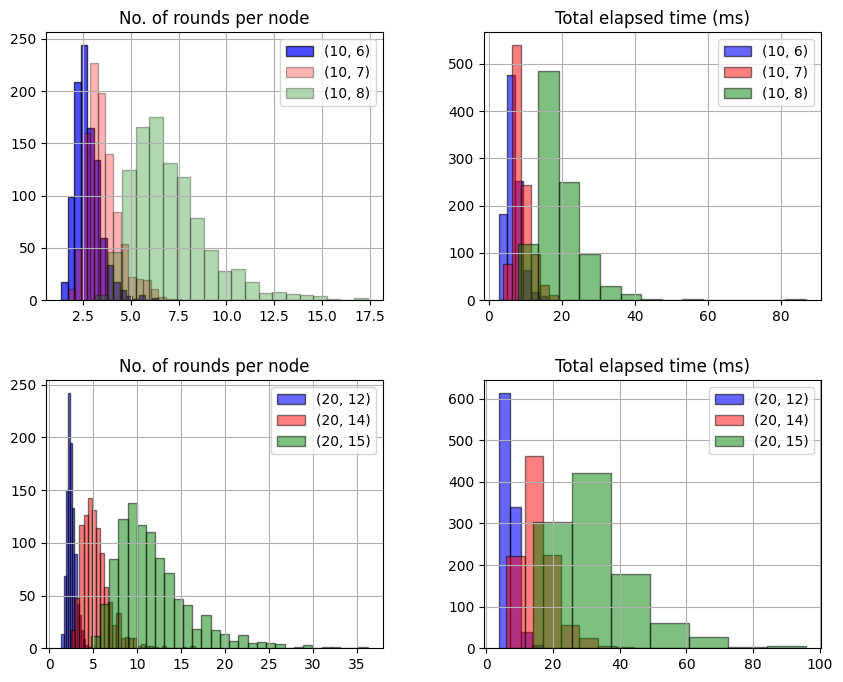

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

SlushResults.hist(column=['rounds (10, 6)'], figsize=(8,6), bins=15, ax= ax[0][0], alpha = 0.7, color = 'b', label="(10, 6)", lw = 1, ec='k')
SlushResults.hist(column=['rounds (10, 7)'], figsize=(8,6), bins=15, ax= ax[0][0], alpha = 0.3, color = 'r', label="(10, 7)", lw = 1, ec='k')
SlushResults.hist(column=['rounds (10, 8)'], figsize=(8,6), bins=20, ax= ax[0][0], alpha = 0.3, color = 'g', label="(10, 8)", lw = 1, ec='k')

SlushResults.hist(column=['time (10, 6)'], figsize=(8,6), bins=6, ax= ax[0][1], alpha = 0.6, color = 'b', label="(10, 6)", lw = 1, ec='k')
SlushResults.hist(column=['time (10, 7)'], figsize=(8,6), bins=6, ax= ax[0][1], alpha = 0.5, color = 'r', label="(10, 7)", lw = 1, ec='k')
SlushResults.hist(column=['time (10, 8)'], figsize=(8,6), bins=14, ax= ax[0][1], alpha = 0.5, color = 'g', label="(10, 8)", lw = 1, ec='k')

SlushResults.hist(column=['rounds (20, 12)'], figsize=(8,6), bins=15, ax= ax[1][0], alpha = 0.6, color = 'b', label="(20, 12)", lw = 1, ec='k')
SlushResults.hist(column=['rounds (20, 14)'], figsize=(8,6), bins=30, ax= ax[1][0], alpha = 0.5, color = 'r', label="(20, 14)", lw = 1, ec='k')
SlushResults.hist(column=['rounds (20, 15)'], figsize=(8,6), bins=30, ax= ax[1][0], alpha = 0.5, color = 'g', label="(20, 15)", lw = 1, ec='k')

SlushResults.hist(column=['time (20, 12)'], figsize=(8,6), bins=4, ax= ax[1][1], alpha = 0.6, color = 'b', label="(20, 12)", lw = 1, ec='k')
SlushResults.hist(column=['time (20, 14)'], figsize=(8,6), bins=12, ax= ax[1][1], alpha = 0.5, color = 'r', label="(20, 14)", lw = 1, ec='k')
SlushResults.hist(column=['time (20, 15)'], figsize=(8,6), bins=7, ax= ax[1][1], alpha = 0.5, color = 'g', label="(20, 15)", lw = 1, ec='k')

ax[0][0].legend(loc = 'upper right')
ax[0][1].legend(loc = 'upper right')
ax[1][0].legend(loc = 'upper right')
ax[1][1].legend(loc = 'upper right')

ax[0][0].set_title("No. of rounds per node")
ax[0][1].set_title("Total elapsed time (ms)")
ax[1][0].set_title("No. of rounds per node")
ax[1][1].set_title("Total elapsed time (ms)")

- The original paper (Team Rocket) claimed that the Snow protocols require $\mathcal{O}(\log n)$ communication rounds (per node) in expectation. Note that $\log n \approx 4.61$.
- Sesar, Cachin and Schneider argued in 2401.0281 that Slush requires a minimum of $\Omega\left(\frac{\log n}{\log k}\right)$ rounds in the absence of adversarial influence. Moreover, they argued that Slush reaches stable consensus in $\mathcal{O}\left(\log n\right)$  rounds even in the presence of up to $\mathcal{O}(\sqrt{n})$ adversaries. 

For $n=101$ we have the minimum number of rounds for stable consensus:
- $k=10$: $\frac{\log n}{\log k} \approx 2$
- $k=20$: $\frac{\log n}{\log k} \approx 1.54$


Note that our observations are that small $k$ leads to faster convergence. However, note that we stop the SlushProtocol_length algorithm before reaching the "all-blue" or "all-red" states. The analysis of Sesar, Cachin and Schneider looks at a state where all but $n - \mathcal{O}(\sqrt{n})$ have the same opinion.

### Introducing Byzantine nodes

When we introduce Byzantine nodes, we have to be careful whether $f > \alpha$ or not. If yes, then the underlying Markov chain will only have one absorbing state, so we need to stop the process early on. Hence, for simplicity we let the algorithm go until all but $\sqrt{n}$ nodes agree on the state.

We assume that the Byzantine nodes are perfectly Byzantine, so they always reply with 0 (assuming that 1 is the correct decision).

In this case, the midpoint is no longer 50% of total nodes. For n=101:

- f = 0 : 50 - 51 is mid point
- f = 1 : 50 - 51 is mid point
- f = 2 : 50 - 51 is mid point
- f = 3 : 51 - 52 is mid point
- f = 4 : 51 - 52 is mid point
- f = 5 : 51 - 52 is mid point
- f = 6 : 51 - 52 is mid point
- f = 7 : 52 - 53 is mid point

In [57]:
SlushResults_Byz = pd.DataFrame()

n, f = 101, 9
colours = np.concatenate((np.zeros(n//2-2-f), np.ones(n//2+1+2)))
np.random.shuffle(colours)
colours = np.concatenate((np.zeros(f), colours))

k, alpha = 10, 6

N = 1000
Ts, Ms = np.zeros(N), np.zeros(N, dtype = int)
param = int(np.sqrt(n))

for j in range(N):
    start_time = time.time()
    Ms[j] = slush(n, f, colours.copy(), k, alpha, param)[1]
    Ts[j] = time.time() - start_time


In [58]:
SlushResults_Byz["m (10, 6, 9)"] = Ms/(n-f)
SlushResults_Byz["t (10, 6, 9)"] = Ts*1000

In [59]:
SlushResults_Byz.describe()

,"m (10, 6, 0)","t (10, 6, 0)","m (10, 6, 1)","t (10, 6, 1)","m (10, 6, 2)","t (10, 6, 2)","m (10, 6, 3)","t (10, 6, 3)","m (10, 6, 4)","t (10, 6, 4)","m (10, 6, 5)","t (10, 6, 5)","m (10, 6, 6)","t (10, 6, 6)","m (10, 6, 7)","t (10, 6, 7)","m (10, 6, 8)","t (10, 6, 8)","m (10, 6, 9)","t (10, 6, 9)"
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.582069,6.011523,2.65535,6.660209,2.797121,6.577901,2.913724,6.701431,3.053247,6.895546,3.184667,7.658503,3.338221,7.681384,3.569213,8.069439,3.876409,8.656616,4.332293,9.564393
std,0.648774,1.653084,0.67314,2.091143,0.662123,1.907449,0.707739,1.748532,0.694168,1.755446,0.795782,2.285699,0.826098,2.095675,0.977661,2.272738,1.187829,2.822511,1.750133,3.939120
min,1.069307,1.994371,1.28000,2.967596,1.464646,2.957821,1.561224,2.991915,1.463918,2.991676,1.697917,3.985405,1.694737,3.956079,1.553191,2.991676,1.483871,2.991676,1.630435,2.991915
25%,2.099010,4.986525,2.19000,4.989028,2.340909,4.989624,2.428571,5.980611,2.577320,5.983829,2.635417,5.984545,2.736842,5.985498,2.848404,5.985916,2.935484,6.944180,2.888587,5.985916
50%,2.455446,5.983829,2.54000,5.988240,2.676768,5.985498,2.785714,5.987644,2.963918,6.980896,3.041667,6.982565,3.236842,7.014871,3.436170,7.978439,3.731183,7.979989,4.010870,8.975983
75%,2.940594,6.981373,3.01000,7.946432,3.131313,7.015765,3.275510,7.976353,3.435567,7.978678,3.617188,8.975506,3.802632,8.975089,4.170213,8.977473,4.666667,9.982646,5.347826,11.967719
max,5.653465,13.963461,6.36000,30.919313,5.424242,31.878948,6.989796,15.957117,6.793814,19.947290,6.854167,38.896799,6.652632,27.925253,10.095745,21.940947,8.021505,31.913757,11.228261,24.933577


Text(0.5, 1.0, 'Total elapsed time (ms)')

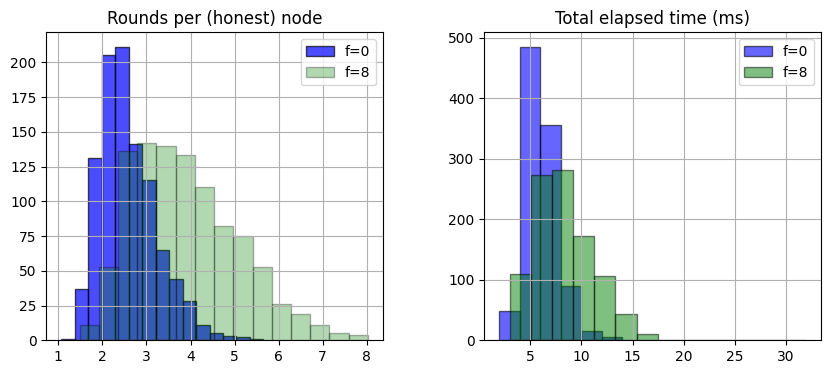

In [65]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

SlushResults_Byz.hist(column=['m (10, 6, 0)'], figsize=(8,6), bins=15, ax= ax[0], alpha = 0.7, color = 'b', label="f=0", lw = 1, ec='k')
#SlushResults_Byz.hist(column=['m (10, 6, 4) '], figsize=(8,6), bins=15, ax= ax[0], alpha = 0.3, color = 'r', label="f=4", lw = 1, ec='k')
SlushResults_Byz.hist(column=['m (10, 6, 8)'], figsize=(8,6), bins=15, ax= ax[0], alpha = 0.3, color = 'g', label="f=8", lw = 1, ec='k')

SlushResults_Byz.hist(column=['t (10, 6, 0)'], figsize=(8,6), bins=6, ax= ax[1], alpha = 0.6, color = 'b', label="f=0", lw = 1, ec='k')
#SlushResults_Byz.hist(column=['t (10, 6, 4)'], figsize=(8,6), bins=6, ax= ax[1], alpha = 0.5, color = 'r', label="f=4", lw = 1, ec='k')
SlushResults_Byz.hist(column=['t (10, 6, 8)'], figsize=(8,6), bins=14, ax= ax[1], alpha = 0.5, color = 'g', label="f=8", lw = 1, ec='k')


ax[0].legend(loc = 'upper right')
ax[1].legend(loc = 'upper right')

ax[0].set_title("Rounds per (honest) node")
ax[1].set_title("Total elapsed time (ms)")


Let us also plot the summary statistics:

In [66]:
M_mean, M_std = np.zeros(10), np.zeros(10)

for j in range(10):
    M_mean[j] = SlushResults_Byz['m (10, 6, '+str(j)+')'].mean()
    M_std[j] = SlushResults_Byz['m (10, 6, '+str(j)+')'].std()


Text(0.5, 0, 'No. of Perfectly Byzantine nodes')

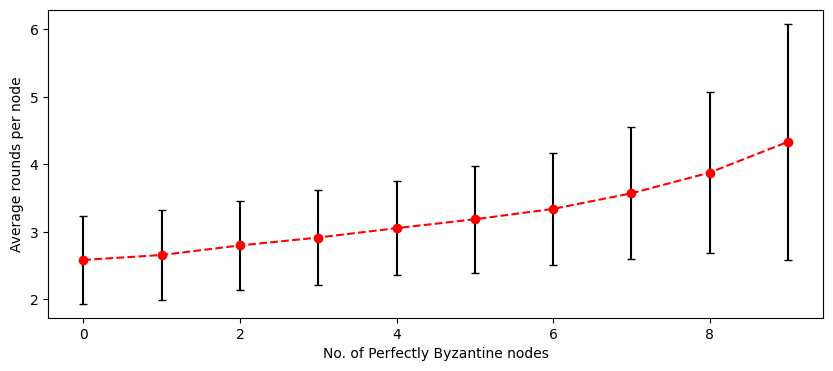

In [67]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))

ax.errorbar(np.arange(10), M_mean, yerr = M_std, capsize=3, fmt="r--o", ecolor = 'black')
ax.set_ylabel("Average rounds per node")
ax.set_xlabel("No. of Perfectly Byzantine nodes")


Conclusions:
- The local Slush algorithm is run until all but $\sqrt{n}$ nodes agree on a state.
- For this, the number of rounds per node sufficient for convergence increases with the number of malicious users.
- However, roughly 4 rounds per node appear to be enough for up to $f \approx \sqrt{n}$.